Try some integrals over G_0(q,q) = (alpha+ c q^2)

In [355]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = '15'


In [329]:
cutoff_length=2*math.pi*10**(-4)
area_factor=2/math.sqrt(math.pi)

In [330]:
c=1
alpha=1/cutoff_length**2
alpha_0= alpha*cutoff_length**2

In [371]:

def int_G(cutoff_length, l, alpha, c):
    sum_=0
    maxq= 1#math.floor(1/cutoff_length)
    minq=cutoff_length/l#math.floor(1/l)
    step=(maxq-minq)/500
    #doing a square shell:
    #        |  
    #        |   ##
    #   ------------
    #        |   ##
    #        |   ##
    #this domain x4
    #print(step)
    for qx in np.arange(minq,maxq, step):
        for qy in np.arange(-maxq+step,minq, step):
            sum_+=step**2/(alpha+c*(qx**2+qy**2))
    return 4*sum_

def int_G_circlelimit(cutoff_length, l, alpha, c):
    sum_=0
    maxq= math.floor(1/cutoff_length*2/math.sqrt(math.pi))
    minq=math.floor(1/l*2/math.sqrt(math.pi))
    minqsquared = minq**2
    maxqsquared=((maxq-1))**2
    #make sure to get a circle, not a square
    for qx in range(math.floor(minq/math.sqrt(2)),maxq ):
        for qy in range(-maxq+1,math.floor(minq/math.sqrt(2))):
            qsquared=qx**2+qy**2
            if qsquared>=minqsquared and qsquared <= maxqsquared:
                sum_+=1/(alpha+c*(qsquared))
    return 4*sum_
 
def int_G2(cutoff_length, l, alpha, c):
    sum_=0
    maxq= 1/area_factor#math.floor(1/cutoff_length)
    minq=cutoff_length/l/area_factor#math.floor(1/l)
    #integrating over d-1 dimensions -> Kd = Omega / 2pi^2,
    #leaving just 1D integral in q
    
    step=(maxq-minq)/20
    for qx in np.arange(minq, maxq, step):
        sum_+=qx/(alpha+c*qx**2)
    return sum_*2*math.pi
                

In [459]:
ls=[x*cutoff_length for x in range(2,200,12)]
ints=[]
ints2=[]

for l in ls:
    ints.append(int_G(cutoff_length, l, alpha=alpha_0, c=c))
#for l in ls:
    #ints2.append(int_G_circlelimit(cutoff_length, l, alpha=alpha_0, c=c))

#plt.plot([l**2 for l in ls], ints)
#plt.plot([l**2 for l in ls], ints2)

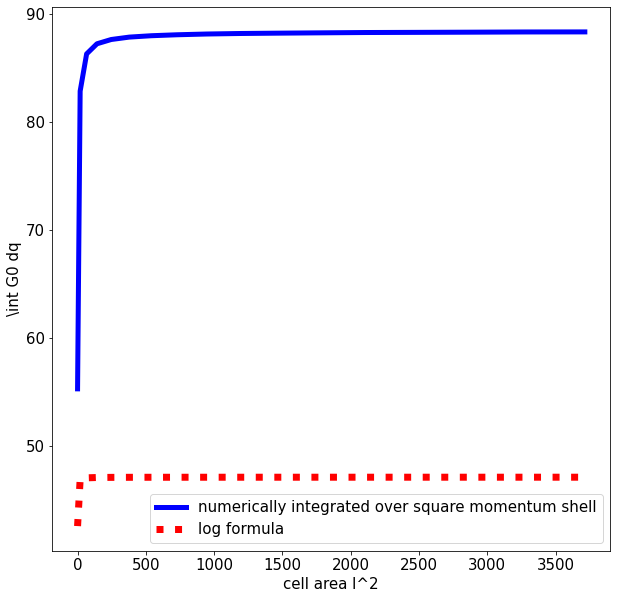

In [456]:
alpha_0=1*cutoff_length*cutoff_length
c=1
plt.plot([l**2 for l in ls], [int_G(cutoff_length, l, alpha=alpha_0, c=c) for l in ls], 
         label="numerically integrated over square momentum shell", linewidth=5, color=cols1[1])
#plt.plot([l for l in ls], ints2, label="numerically integrated over circlular momentum shell", linewidth=5, linestyle='--')
plt.plot([l**2 for l in ls], [get_alpha_corrected((l,l)) for l in ls], 
        linewidth=7, linestyle=':',label="log formula", color=cols2[1])
plt.legend()
#plt.title("comparing square domain and circular formula results, c="+str(c))
plt.ylabel("\int G0 dq")
plt.xlabel("cell area l^2")
#plt.savefig("/home/jsk/Documents/phd/square_domain_b_c"+str(c)+".png")
plt.show()

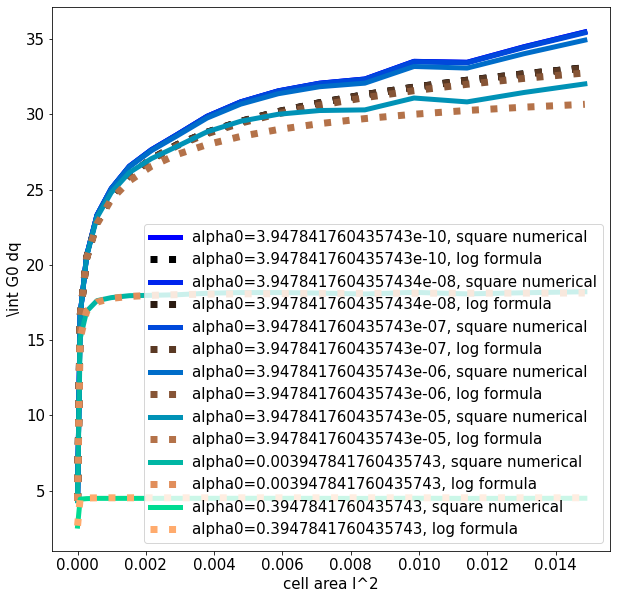

In [477]:
cols1 = [plt.cm.winter(i/7) for i in range(7)]
cols2 = [plt.cm.copper(i/7) for i in range(7)]
c=1
for i,alpha_0 in enumerate([x*cutoff_length**2 for x in [.001, .1, 1, 10, 100,10000, 1000000]]):
    plt.plot([l**2 for l in ls], [int_G(cutoff_length, l, alpha=alpha_0, c=c) for l in ls], label="alpha0="+str(alpha_0)+", square numerical", linewidth=5,color=cols1[i])
    #plt.plot([l for l in ls], ints2, label="numerically integrated over circlular momentum shell", linewidth=5, linestyle='--')
    plt.plot([l**2 for l in ls], [get_alpha_corrected((l,l)) for l in ls], 
        linewidth=7, linestyle=':',label="alpha0="+str(alpha_0)+", log formula", color=cols2[i])
plt.legend()
#plt.title("comparing square domain and circular formula results, c="+str(c))
plt.ylabel("\int G0 dq")
plt.xlabel("cell area l^2")
#plt.savefig("/home/jsk/Documents/phd/square_domain_b_c"+str(c)+".png")
plt.show()

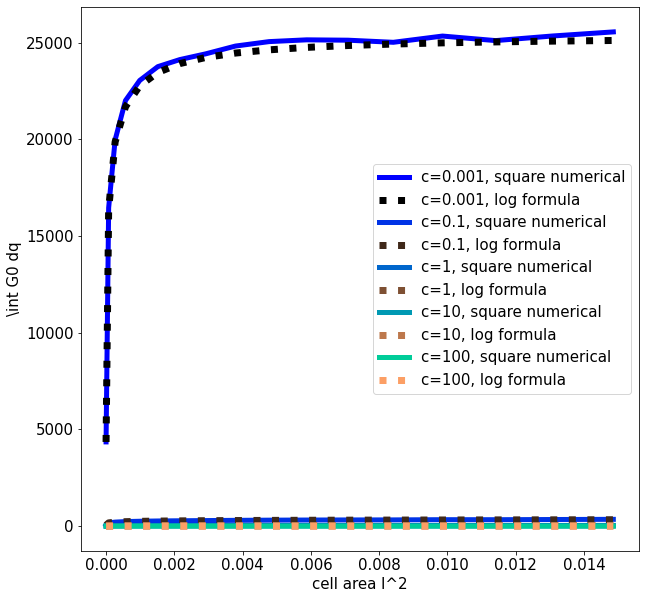

In [397]:
cols1 = [plt.cm.winter(i/5) for i in range(5)]
cols2 = [plt.cm.copper(i/5) for i in range(5)]
alpha_0=1*cutoff_length**2
for i,c in enumerate([x for x in [.001, .1, 1, 10, 100]]):
    plt.plot([l**2 for l in ls], [int_G(cutoff_length, l, alpha=alpha_0, c=c) for l in ls], label="c="+str(c)+", square numerical", linewidth=5,color=cols1[i])
    #plt.plot([l for l in ls], ints2, label="numerically integrated over circlular momentum shell", linewidth=5, linestyle='--')
    plt.plot([l**2 for l in ls], [get_alpha_corrected((l,l)) for l in ls], 
        linewidth=7, linestyle=':',label="c="+str(c)+", log formula", color=cols2[i])
plt.legend()
#plt.title("comparing square domain and circular formula results, c="+str(c))
plt.ylabel("\int G0 dq")
plt.xlabel("cell area l^2")
#plt.savefig("/home/jsk/Documents/phd/square_domain_b_c"+str(c)+".png")
plt.show()

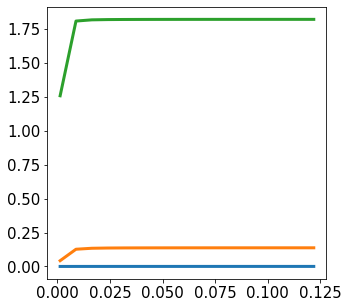

In [339]:
for c in [100000,100,1]:
    plt.plot([l for l in ls], [get_alpha_corrected((l,l)) for l in ls], 
        linewidth=3)

In [473]:
def int_G_rect(cutoff_length, lx,ly, alpha, c):
    sum_1=0
    sum_2=0
    maxq= 1#math.floor(1/cutoff_length)
    minqx=cutoff_length/lx#math.floor(1/l)
    minqy=cutoff_length/ly
    step=(maxq-min(minqx, minqy))/5000
    #doing a rectangular shell:
    #        |        _ minqy
    #        |   #####
    #   ------------
    #        |   #####
    #        |   #####'maxq
    #           'minqx 
    #this domain x2
    for qx in np.arange(minqx,maxq,step):
        for qy in np.arange(-maxq+step,minqy, step):
            sum_1+=1/(alpha+c*(qx**2+qy**2))
    sum_1*=2
    #     ###|########  
    #        |   
    #   ------------
    #        |   
    #        |   
    #this domain x2
    for qy in np.arange(minqy,maxq ,step):
        for qx in np.arange(-maxq+step,minqx,step):
            sum_2+=1/(alpha+c*(qx**2+qy**2))
    sum_2*=2
    return (sum_1+sum_2)*step**2 #measure of the integrals

In [416]:
def int_G_rect_approx(cutoff_length, lx,ly, alpha=1, c=1):
    sum_=0
    maxq= math.floor(1/cutoff_length)
    minqx=math.floor(1/lx)
    minqy=math.floor(1/ly)
    largerminq=max(minqx, minqy)
    smallerminq=min(minqx, minqy)
    #the thicker square shell
    for qx in range(smallerminq,maxq ):
        for qy in range(-maxq+1,smallerminq):
            sum_+=1/(alpha+c*(qx**2+qy**2))
    sum_*=4
    #subtract a bit that is also left out 
    sides = 0
    side_width = len(range(-smallerminq+1,smallerminq))
    for qx in range(smallerminq, largerminq):
        if qx!=0:
            sides+=1/(alpha+c*(qx**2))
    print(sum_, sides)
    sum_-=2*sides*side_width
    return sum_

In [130]:
aspect_ratios=[1,2,5, 10, 100, 500]
ints_rect={}
for ar in aspect_ratios:
    lxs=[l*math.sqrt(ar) for l in ls]
    lys=[l/math.sqrt(ar) for l in ls]
    ints_rect[ar]=[]
    for lx, ly in zip(lxs, lys):
        ints_rect[ar].append(int_G_rect(cutoff_length, lx, ly, c=c))

In [131]:
ints_rect_approx={}
for ar in aspect_ratio:
    lxs=[l*math.sqrt(ar) for l in ls]
    lys=[l/math.sqrt(ar) for l in ls]
    ints_rect_approx[ar]=[]
    for lx, ly in zip(lxs, lys):
        ints_rect_approx[ar].append(int_G_rect_approx(cutoff_length, lx, ly, c=c))

0 0
16.159456017201542 0
20.3356245126027 0
22.757921123607744 0
24.638478135325165 0
25.964585102187804 0
27.333394577137675 0
28.32489813372741 0
29.084753074127395 0
29.948828442360348 0
30.429670954064267 0
31.517234286099296 0
32.140124383699366 0
32.140124383699366 0
32.830824475909694 0
33.60567062806302 0
33.60567062806302 0
2.1784416132702544 0.0004447406380246018
18.367146972929234 0.005898219603806568
22.46913394138311 0.011294580804371747
25.050214846135887 0.01707734744986144
27.03478531166992 0.02400260473795297
28.32489813372741 0.028905644022976212
29.502016046156886 0.034947364407830306
30.429670954064267 0.04059735778646628
31.517234286099296 0.05047329202675963
32.140124383699366 0.0535562174307175
32.830824475909694 0.05991198536578742
33.60567062806302 0.06795727430467624
34.48758082574076 0.08353249554361432
34.48758082574076 0.07845635341163462
35.510020419171475 0.09960102749748516
35.510020419171475 0.09270447577334723
36.72430852757273 0.12296929292341029
5.06

In [443]:
def fct_for_rect(cutoff_length, lx, ly, alpha=1, c=1):
    maxq=math.floor(1/cutoff_length * 2/math.sqrt(math.pi))
    minqx=math.floor(1/lx)
    minqy=math.floor(1/ly)
    largerminq=max(minqx, minqy)-1
    smallerminq=min(minqx, minqy)
    circle_shell = (math.log(alpha+c*maxq**2)-math.log(alpha+c*(smallerminq* 2/math.sqrt(math.pi))**2))*math.pi/c #*2pi/2c
    correction = (math.atan(math.sqrt(c)* (largerminq)/ math.sqrt(alpha))-math.atan(math.sqrt(c)* smallerminq/ math.sqrt(alpha)))*2/math.sqrt(alpha*c)
    sidewidth=2*smallerminq-2
    correction*=2*sidewidth
    return circle_shell-correction

In [450]:
def get_alpha_corrected(cell_dims):
    l_max = max(cell_dims)
    l_min = min(cell_dims)
    qmax = area_factor
    smaller_qmin = area_factor/(l_max/cutoff_length)
    larger_qmin =  area_factor/(l_min/cutoff_length)
    integral = (math.log(alpha_0+c*qmax**2)-math.log(alpha_0+c*smaller_qmin**2))*math.pi/c
    if l_max != l_min:
        smaller_qmin /= area_factor
        larger_qmin /= area_factor
        if alpha_0 >0:
            side_integral = (math.atan(math.sqrt(c)* (larger_qmin)/ math.sqrt(alpha))-math.atan(math.sqrt(c)* smaller_qmin/ math.sqrt(alpha)))/math.sqrt(alpha*c)
            integral -= 4* smaller_qmin * side_integral
    #print(qmax, smaller_qmin)
    return integral

Text(0, 0.5, 'correction \\int G0 dq')

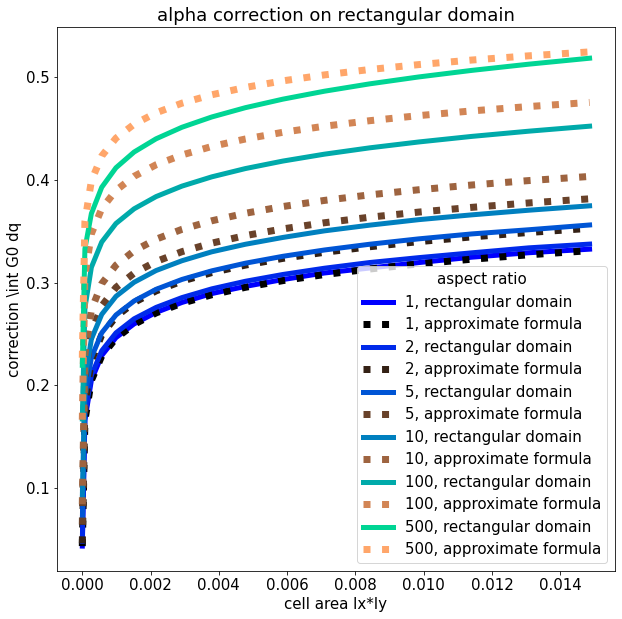

In [474]:
#plt.plot([l**2 for l in ls], ints)
#plt.plot([l**2 for l in ls], ints3)
c=100
alpha_0=1*cutoff_length**2
cols2 = dict( [(ar, plt.cm.autumn(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
cols1 = dict( [(ar, plt.cm.winter(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
cols3 = dict( [(ar, plt.cm.copper(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
for ar in aspect_ratio:
    lxs= [l*math.sqrt(ar) for l in ls]
    lys= [l/math.sqrt(ar) for l in ls]
    plt.plot([lx*ly for lx,ly in zip(lxs, lys)], [int_G_rect(cutoff_length, lx,ly, alpha=alpha_0, c=c) for lx,ly in zip(lxs, lys)], label=str(ar)+", rectangular domain", linewidth=5, color=cols1[ar])
    #plt.plot([lx*ly for lx,ly in zip(lxs, lys)], ints_rect_approx[ar], label=str(ar), linewidth=2, color=cols2[ar], linestyle='--')
    plt.plot([lx*ly for lx,ly in zip(lxs, lys)], [get_alpha_corrected((lx,ly)) for lx, ly in zip(lxs, lys)], label=str(ar)+", approximate formula", linewidth=7, color=cols3[ar], linestyle=':')
    #analytical answer: integrate arctan(sqrt(c) qx/(sqrt(a+cqy**2)))/(sqrt(a+cqy**2)

plt.legend(title="aspect ratio")
plt.title("alpha correction on rectangular domain")
plt.xlabel("cell area lx*ly")
plt.ylabel("correction \int G0 dq")
#plt.xlim((0,2))
#plt.savefig("rect_approx_c"+str(c)+"_a.png")

In [ ]:
#let's draw the real space domain to be integrated over and the q-space domain
graph_size=10
square_l_domain = np.zeros((2*graph_size+1, 2*graph_size+1))
cutoff_length=1
lx=16//2
ly=16//2
for i in range(2*graph_size+1):
    for j in range(2*graph_size+1):
        i_loc=i-graph_size
        j_loc=j-graph_size
        if (abs(i_loc)>lx or abs(j_loc)>ly):
            square_l_domain[i,j]=1
        elif (abs(i_loc)<cutoff_length and abs(j_loc)<cutoff_length):
            square_l_domain[i,j]=-1
sb.heatmap(square_l_domain,xticklabels=False, yticklabels=False, cbar=False, cmap='RdGy')
#plt.savefig("domain1.png")

In [ ]:
#shown in momentum space
#Q=1/cutoff_length (x maxlx, Q=1)-> maxlx  (>1)
#qmin = Q / lx -> 1 
reciprocal_square = np.zeros((2*graph_size+1, 2*graph_size+1))
lx=16//2
ly=16//2
display=.6
for i in range(2*graph_size+1):
    for j in range(2*graph_size+1):
        i_loc=(i-graph_size)
        j_loc=(j-graph_size)
        lmax=max(lx,ly)
        lmin=min(lx,ly)
        qx=i_loc*lmax/4*display
        qy=j_loc*lmax/4*display
        qxmin=1
        qymin = lmax/lmin
        qmax = lmax
        #print(qx, 1, lx)
        #print(qy, 1, ly)
        #momentum space criteria: location (representing qx,qy) not in domain of integration if
        # qx & qy > maxlx (these are in microscopic cell), 
        # qx<lx or qy<ly (long wavelength modes dont fit in cell)
        if (abs(qx)<1 and abs(qy)<1):
            #not in domain:
            reciprocal_square[i,j]=1
        elif (abs(qx)>lx or abs(qy)>ly):
            #not in domain:
            reciprocal_square[i,j]=-1
sb.heatmap(reciprocal_square,xticklabels=False, yticklabels=False, cbar=False, cmap='RdGy')
#plt.savefig("domain2.png")

In [ ]:
graph_size=10
rect_l_domain = np.zeros((2*graph_size+1, 2*graph_size+1))
cutoff_length=1
lx=16//2
ly=4//2
for i in range(2*graph_size+1):
    for j in range(2*graph_size+1):
        i_loc=i-graph_size
        j_loc=j-graph_size
        if (abs(i_loc)>lx or abs(j_loc)>ly):
            rect_l_domain[i,j]=1
        elif (abs(i_loc)<cutoff_length and abs(j_loc)<cutoff_length):
            rect_l_domain[i,j]=-1
sb.heatmap(rect_l_domain,xticklabels=False, yticklabels=False, cbar=False, cmap='RdGy')
#plt.savefig("domain3.png")

In [ ]:
reciprocal_rect = np.zeros((2*graph_size+1, 2*graph_size+1))
lx=16//2
ly=4//2
display=.6
for i in range(2*graph_size+1):
    for j in range(2*graph_size+1):
        i_loc=(i-graph_size)
        j_loc=(j-graph_size)
        lmax=max(lx,ly)
        lmin=min(lx,ly)
        qx=i_loc*lmax/4*display
        qy=j_loc*lmax/4*display
        qxmin=1
        qymin = lmax/lmin
        qmax = lmax
        #print(qx, 1, lx)
        #print(qy, 1, ly)
        #momentum space criteria: location (representing qx,qy) not in domain of integration if
        # qx & qy > maxlx (these are in microscopic cell), 
        # qx<1 or qy<1 (long wavelength modes dont fit in cell)
        if (abs(qx)<qxmin and abs(qy)<qymin):
            reciprocal_rect[i,j]=1
        elif (abs(qx)>qmax or abs(qy)>qmax):
            reciprocal_rect[i,j]=-1
sb.heatmap(reciprocal_rect,xticklabels=False, yticklabels=False, cbar=False, cmap='RdGy')
plt.savefig("domain4.png")

In [ ]:
graph_size=100
rect_l_domain2 = np.zeros((2*graph_size+1, 2*graph_size+1))
cutoff_length=10
lx=160//2
ly=40//2
for i in range(2*graph_size+1):
    for j in range(2*graph_size+1):
        i_loc=i-graph_size
        j_loc=j-graph_size
        if (abs(i_loc)>lx or abs(j_loc)>ly):
            rect_l_domain2[i,j]=1
        elif (i_loc**2+j_loc**2<cutoff_length**2):
            rect_l_domain2[i,j]=-1
sb.heatmap(rect_l_domain2,xticklabels=False, yticklabels=False, cbar=False, cmap='RdGy')

In [ ]:
reciprocal_rect2 = np.zeros((2*graph_size+1, 2*graph_size+1))
lx=160//2
ly=40//2
display=.01
for i in range(2*graph_size+1):
    for j in range(2*graph_size+1):
        i_loc=(i-graph_size)
        j_loc=(j-graph_size)
        lmax=max(lx,ly)
        lmin=min(lx,ly)
        qx=i_loc*lmax*display
        qy=j_loc*lmax*display
        qxmin=1
        qymin = lmax/lmin
        qmax = lmax
        #print(qx, 1, lx)
        #print(qy, 1, ly)
        #momentum space criteria: location (representing qx,qy) not in domain of integration if
        # qx & qy > maxlx (these are in microscopic cell), 
        # qx<1 or qy<1 (long wavelength modes dont fit in cell)
        if (abs(qx)<qxmin and abs(qy)<qymin):
            reciprocal_rect2[i,j]=1
        elif ((qy**2+qx**2)>qmax**2):
            reciprocal_rect2[i,j]=-1
sb.heatmap(reciprocal_rect2,xticklabels=False, yticklabels=False, cbar=False, cmap='RdGy')
plt.savefig("domain4.png")